In [1]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from IPython.display import Audio 

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#from tensorflow.keras.layers import Dense, LSTM, Dropout


In [3]:
# Dealing with warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


warnings.filterwarnings('ignore', category=DeprecationWarning)

### Preparing Data

In [4]:
import os
fileEmotion=[]
filePath=[]
fileNumber=[]
files=os.listdir("C:\\Users\\asus\\Speech Emotion Recognition\\CREMA-D")
for file in files:
    part=file.split("_")
    fileEmotion.append(part[2])
    fileNumber.append(part[0])
    filePath.append("C:\\Users\\asus\\Speech Emotion Recognition\\CREMA-D"+'\\'+file)



In [5]:
df=pd.DataFrame(fileEmotion, columns=['Emotions'])
df.replace(['ANG','DIS','FEA','HAP','NEU'],['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL'], inplace=True)
df.insert(0,'FileNumber',fileNumber)
df.insert(2,'FilePath',filePath)
df

,FileNumber,Emotions,FilePath
0,1001,ANGRY,C:\Users\asus\Speech Emotion Recognition\CREMA...
1,1001,DISGUST,C:\Users\asus\Speech Emotion Recognition\CREMA...
2,1001,FEAR,C:\Users\asus\Speech Emotion Recognition\CREMA...
3,1001,HAPPY,C:\Users\asus\Speech Emotion Recognition\CREMA...
4,1001,NEUTRAL,C:\Users\asus\Speech Emotion Recognition\CREMA...
...,...,...,...
7437,1091,DISGUST,C:\Users\asus\Speech Emotion Recognition\CREMA...
7438,1091,FEAR,C:\Users\asus\Speech Emotion Recognition\CREMA...
7439,1091,HAPPY,C:\Users\asus\Speech Emotion Recognition\CREMA...
7440,1091,NEUTRAL,C:\Users\asus\Speech Emotion Recognition\CREMA...


In [6]:
df.to_csv("Crema-D Summary.csv", index=False)
df.head(10)

,FileNumber,Emotions,FilePath
0,1001,ANGRY,C:\Users\asus\Speech Emotion Recognition\CREMA...
1,1001,DISGUST,C:\Users\asus\Speech Emotion Recognition\CREMA...
2,1001,FEAR,C:\Users\asus\Speech Emotion Recognition\CREMA...
3,1001,HAPPY,C:\Users\asus\Speech Emotion Recognition\CREMA...
4,1001,NEUTRAL,C:\Users\asus\Speech Emotion Recognition\CREMA...
5,1001,SAD,C:\Users\asus\Speech Emotion Recognition\CREMA...
6,1001,ANGRY,C:\Users\asus\Speech Emotion Recognition\CREMA...
7,1001,ANGRY,C:\Users\asus\Speech Emotion Recognition\CREMA...
8,1001,ANGRY,C:\Users\asus\Speech Emotion Recognition\CREMA...
9,1001,DISGUST,C:\Users\asus\Speech Emotion Recognition\CREMA...


In [7]:
df=pd.read_csv("Crema-D Summary.csv")
df

,FileNumber,Emotions,FilePath
0,1001,ANGRY,C:\Users\asus\Speech Emotion Recognition\CREMA...
1,1001,DISGUST,C:\Users\asus\Speech Emotion Recognition\CREMA...
2,1001,FEAR,C:\Users\asus\Speech Emotion Recognition\CREMA...
3,1001,HAPPY,C:\Users\asus\Speech Emotion Recognition\CREMA...
4,1001,NEUTRAL,C:\Users\asus\Speech Emotion Recognition\CREMA...
...,...,...,...
7437,1091,DISGUST,C:\Users\asus\Speech Emotion Recognition\CREMA...
7438,1091,FEAR,C:\Users\asus\Speech Emotion Recognition\CREMA...
7439,1091,HAPPY,C:\Users\asus\Speech Emotion Recognition\CREMA...
7440,1091,NEUTRAL,C:\Users\asus\Speech Emotion Recognition\CREMA...


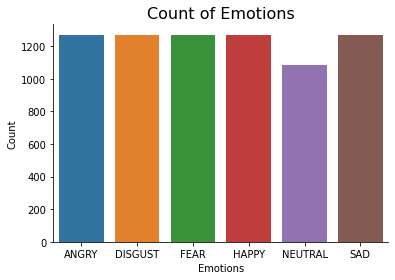

In [8]:
#Drawing a countplot
import seaborn as sns
sns.countplot(df.Emotions)
plt.xlabel('Emotions',size=10)
plt.ylabel('Count',size=10)
plt.title('Count of Emotions',size=16)
sns.despine()
plt.show()

### Wave-plot of audiofile

In [9]:
# Creating waveplot 
def createWave(data, sr, x):
    img=librosa.display.waveshow(data, sr=sr)
    plt.title('Waveplot for {} emotion'.format(x), size=16)
    plt.figure(figsize=(10,4))
    plt.show()

### Spectrogram of audiofile

In [10]:
# Creating spectogram
def createSpectrogram(data, sr, x):
    s=np.abs(librosa.stft(data))
    S=librosa.amplitude_to_db(s, ref=np.max)
    librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')
    plt.title('Spectrogram for {} emotion'.format(x), size=16)
    plt.colorbar(format='%+2.f dB')
    plt.figure(figsize=(10,4))
    plt.show()

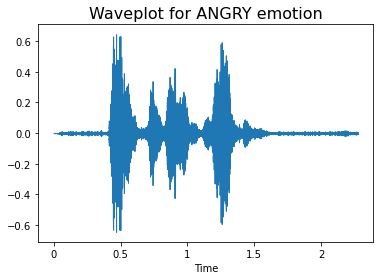

<Figure size 720x288 with 0 Axes>

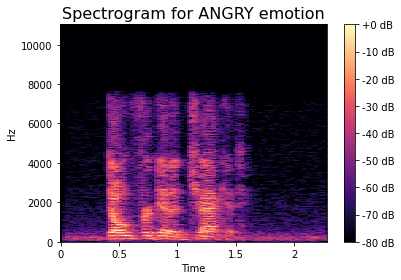

<Figure size 720x288 with 0 Axes>

In [11]:
# drawing waveplot and spectrogram for angry emotion

emotion='ANGRY'
path=df.FilePath[df.Emotions==emotion][0]
file, sr=librosa.load(path)
createWave(file, sr, emotion)
createSpectrogram(file, sr, emotion)
Audio(path)

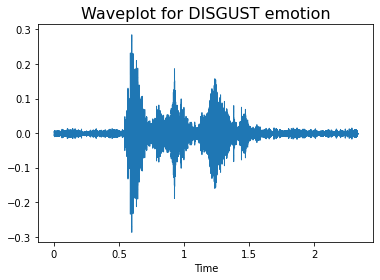

<Figure size 720x288 with 0 Axes>

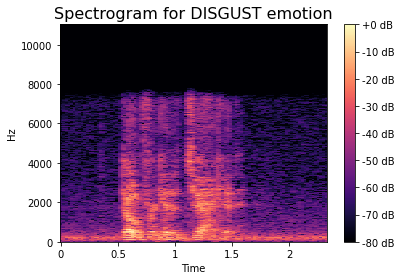

<Figure size 720x288 with 0 Axes>

In [12]:
# drawing waveplot and spectrogram for disgust emotion

emotion='DISGUST'
path1=df.FilePath[df.Emotions==emotion][1]
file, sr=librosa.load(path1)
createWave(file, sr, emotion)
createSpectrogram(file, sr, emotion)
Audio(path1)

### Data Augmentation

In [13]:
data, sr=librosa.load(path1)

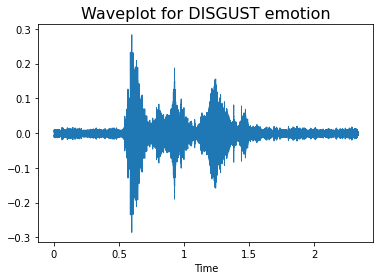

<Figure size 720x288 with 0 Axes>

In [14]:
# Adding noise

def add_noise(data):
    x=data.std()
    noise=np.random.normal(0, x, data.size)
    aug_data=data + noise*0.1
    return aug_data

noise_data=add_noise(data)
createWave(noise_data, sr, emotion)

In [15]:
import soundfile as sf

sf.write('added_noise.wav', noise_data, sr)
Audio('added_noise.wav')

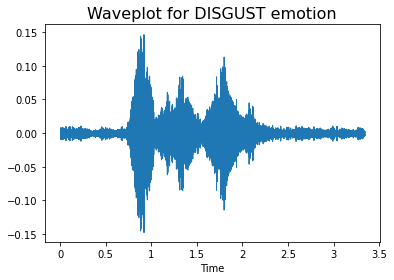

<Figure size 720x288 with 0 Axes>

In [16]:
# Time-Stretch

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.7)

stretch_data=stretch(data)

sf.write('stretch_time.wav', stretch_data, sr)
createWave(stretch_data, sr, emotion)
Audio('stretch_time.wav')

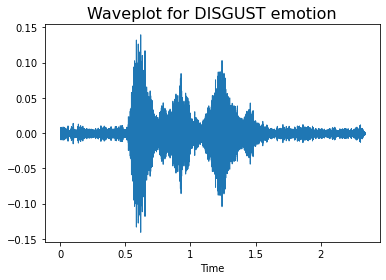

<Figure size 720x288 with 0 Axes>

In [17]:
# Pitch-Shift

def pitch(data):
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=0.7)

pitchShift_data=pitch(data)

sf.write('shift_pitch.wav', pitchShift_data, sr)
createWave(pitchShift_data, sr, emotion)
Audio('shift_pitch.wav')

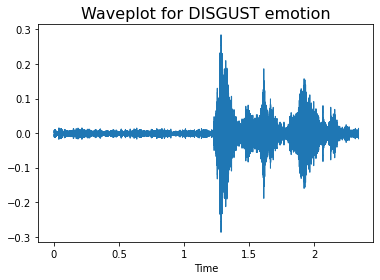

<Figure size 720x288 with 0 Axes>

In [18]:
# Shift Data

def shift(data):
    shiftRange=int(np.random.uniform(low=15, high=20)*1000)
    return np.roll(data, shiftRange)

shift_data=shift(data)

sf.write('shift_data.wav', shift_data, sr)
createWave(shift_data, sr, emotion)
Audio('shift_data.wav')

### Feature Extraction

In [19]:
# Extracting 3 important features i.e. mfcc, chroma, mel-spectrogram

def extractFeature(path, mfcc, chroma, mel):
    data, sr=sf.read(path, dtype='float32')
    
    res=np.array([])
    
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40).T, axis=0)
        res=np.hstack((res, mfccs))
    
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(data)), sr=sr).T, axis=0)
        res=np.hstack((res, chroma))
    
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(data, sr=sr).T, axis=0)
        res=np.hstack((res, mel))
    
    return res

In [20]:
x=[]

paths=df.FilePath
paths=[i for i in paths]
for path in paths:
    features=extractFeature(path, mfcc=True, chroma=True, mel=True)
    x.append(features)
    

In [21]:
X=np.array(x)
X

array([[-3.06027405e+02,  9.26702347e+01,  8.49131203e+00, ...,
         2.87466776e-03,  3.21733882e-03,  2.53657531e-03],
       [-3.46399628e+02,  9.58391190e+01,  1.05162821e+01, ...,
         1.00346364e-03,  1.27373182e-03,  1.16716407e-03],
       [-3.21420258e+02,  9.47609100e+01,  8.15539742e+00, ...,
         1.33792115e-02,  1.02565568e-02,  8.36173445e-03],
       ...,
       [-3.70487915e+02,  9.06381073e+01,  3.89696960e+01, ...,
         3.73176089e-03,  6.23434689e-03,  6.94330595e-03],
       [-3.93181244e+02,  9.43532867e+01,  4.52518692e+01, ...,
         1.34759257e-03,  1.12457783e-03,  1.00039737e-03],
       [-4.28943237e+02,  9.59659042e+01,  4.75163155e+01, ...,
         5.89524745e-04,  1.01915968e-03,  1.42694882e-03]])

In [22]:
X.shape

(7442, 180)

In [23]:
# Input split for LSTM model

x=np.expand_dims(X,-1)
x.shape

(7442, 180, 1)

In [30]:
# Saving featues array in a file to save time 
file=open('Features-LSTM_Crema-D', 'wb')
np.save(file, x)
file.close()

In [38]:
# Loding the features file
file=open('Features-LSTM_Crema-D', 'rb')
x=np.load(file)
x.shape

(7442, 180, 1)

In [32]:
df[['Emotions']]

,Emotions
0,ANGRY
1,DISGUST
2,FEAR
3,HAPPY
4,NEUTRAL
...,...
7437,DISGUST
7438,FEAR
7439,HAPPY
7440,NEUTRAL


In [48]:
#getting outputs encoded

enc=OneHotEncoder()
y= enc.fit_transform(df[['Emotions']])
y, y.shape

(<7442x6 sparse matrix of type '<class 'numpy.float64'>'
 	with 7442 stored elements in Compressed Sparse Row format>,
 (7442, 6))

In [50]:
y=y.toarray()

### Initialising model

In [51]:
model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(180,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 123)               61500     
                                                                 
 dense_6 (Dense)             (None, 64)                7936      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 6)                 198       
                                                                 
Total params: 71,714
Trainable params: 71,714
Non-trai

In [52]:
# Training Model

model.fit(x,y, validation_split=0.2, epochs=100, batch_size=512)

Epoch 1/100
12/12 [==============================] - 12s 888ms/step - loss: 1.7881 - accuracy: 0.1737 - val_loss: 1.7490 - val_accuracy: 0.2035
Epoch 2/100
12/12 [==============================] - 11s 906ms/step - loss: 1.7344 - accuracy: 0.2745 - val_loss: 1.6770 - val_accuracy: 0.3230
Epoch 3/100
12/12 [==============================] - 11s 945ms/step - loss: 1.7143 - accuracy: 0.2647 - val_loss: 1.6372 - val_accuracy: 0.3203
Epoch 4/100
12/12 [==============================] - 10s 813ms/step - loss: 1.6488 - accuracy: 0.2914 - val_loss: 1.6280 - val_accuracy: 0.2948
Epoch 5/100
12/12 [==============================] - 10s 879ms/step - loss: 1.5790 - accuracy: 0.3136 - val_loss: 1.5784 - val_accuracy: 0.3217
Epoch 6/100
12/12 [==============================] - 10s 830ms/step - loss: 1.5564 - accuracy: 0.3292 - val_loss: 1.5617 - val_accuracy: 0.3277
Epoch 7/100
12/12 [==============================] - 12s 979ms/step - loss: 1.5560 - accuracy: 0.3286 - val_loss: 1.5363 - val_accuracy:

Epoch 58/100
12/12 [==============================] - 10s 836ms/step - loss: 1.4507 - accuracy: 0.4027 - val_loss: 1.5194 - val_accuracy: 0.3553
Epoch 59/100
12/12 [==============================] - 9s 746ms/step - loss: 1.4466 - accuracy: 0.4023 - val_loss: 1.4997 - val_accuracy: 0.3727
Epoch 60/100
12/12 [==============================] - 10s 879ms/step - loss: 1.4429 - accuracy: 0.4090 - val_loss: 1.5213 - val_accuracy: 0.3640
Epoch 61/100
12/12 [==============================] - 9s 789ms/step - loss: 1.4393 - accuracy: 0.4119 - val_loss: 1.5005 - val_accuracy: 0.3714
Epoch 62/100
12/12 [==============================] - 10s 818ms/step - loss: 1.4399 - accuracy: 0.4047 - val_loss: 1.5130 - val_accuracy: 0.3647
Epoch 63/100
12/12 [==============================] - 9s 761ms/step - loss: 1.4387 - accuracy: 0.4072 - val_loss: 1.4911 - val_accuracy: 0.3714
Epoch 64/100
12/12 [==============================] - 10s 805ms/step - loss: 1.4399 - accuracy: 0.4112 - val_loss: 1.5044 - val_accur

In [53]:
import joblib

joblib.dump(model, 'model_lstm_crema.pkl')
clf=joblib.load('model_lstm_crema.pkl')

INFO:tensorflow:Assets written to: ram://04662ee8-41ef-459b-805b-be9f30502bd6/assets


INFO:tensorflow:Assets written to: ram://04662ee8-41ef-459b-805b-be9f30502bd6/assets


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://480e43dc-7ae5-4f65-89bc-bb4d5f56d416/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [ ]:
#predicting using model
exp_y = y_test
pred_y = clf.predict(x_test)

In [ ]:
cm=confusion_matrix(exp_y, pred_y)
cm

In [ ]:
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(exp_y, pred_y))

In [ ]:
accuracy_score(y_true=y_test, y_pred=pred_y)*100

In [ ]:
model.score(x_test,y_test)